# Maximizing Margin Demonstration

This notebook demonstrates the concept of maximizing the margin in a support vector machine model for a binary classification problem.

## Import Required Libraries

Import the necessary libraries including numpy, matplotlib, and scikit-learn.

In [1]:
# Import necessary libraries.
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from sklearn.svm import SVC

## Helper Functions

Define helper functions for data generation and plotting.

In [2]:
def generate_class_data(n_points: int, loc: int, scale: float) -> np.ndarray:
    """
    Function to generate random points for a class.

    Args:
        n_points (int): Number of points to generate.
        loc (int): Mean of the normal distribution.
        scale (float): Standard deviation of the normal distribution.

    Returns:
        np.ndarray: Random points for a class.
    """
    return np.random.normal(loc=loc, scale=scale, size=(n_points, 2))


def plot_data(ax: plt.Axes, data: np.ndarray, color: str, edgecolor: str):
    """
    Function to plot data points.

    Args:
        ax (plt.Axes): Matplotlib axis object.
        data (np.ndarray): Data points to plot.
        color (str): Color of the points.
        edgecolor (str): Edge color of the points.
    """
    ax.scatter(data[:, 0], data[:, 1], color=color, s=100, edgecolor=edgecolor)


def plot_support_vectors_and_hyperplane(
        ax: plt.Axes, model: SVC, w: np.ndarray, xx: np.ndarray, color: str,
        linestyle: str, label: str
    ):
    """
    Function to plot support vectors and hyperplane

    Args:
        ax (plt.Axes): Matplotlib axis object.
        model (SVC): SVM model.
        w (np.ndarray): Coefficients of the hyperplane.
        xx (np.ndarray): Range of x values.
        color (str): Color of the hyperplane.
        linestyle (str): Line style of the hyperplane.
        label (str): Label for the hyperplane.
    """
    a = -w[0] / w[1]
    yy = a * xx - model.intercept_[0] / w[1]
    ax.plot(xx, yy, color=color, linestyle=linestyle, label=label)
    ax.scatter(
        model.support_vectors_[:, 0], model.support_vectors_[:, 1],
        s=200, facecolors="none", edgecolors="#44546A", label="Support Vectors"
    )


def draw_margin_lines(
        ax: plt.Axes, sv: np.ndarray, w: np.ndarray, intercept: float,
        color: str, linestyle: str, linewidth: float
    ):
    """
    Function to draw margin lines for support vectors.

    Args:
        ax (plt.Axes): Matplotlib axis object.
        sv (np.ndarray): Support vector.
        w (np.ndarray): Coefficients of the hyperplane.
        intercept (float): Intercept of the hyperplane.
        color (str): Color of the margin lines.
        linestyle (str): Line style of the margin lines.
        linewidth (float): Line width of the margin lines.
    """
    distance = (w[0] * sv[0] + w[1] * sv[1] + intercept) / np.linalg.norm(w)
    closest_point = sv - distance * w / np.linalg.norm(w)
    ax.plot(
        [sv[0], closest_point[0]], [sv[1], closest_point[1]],
        color=color, linestyle=linestyle, linewidth=linewidth
    )

## Generate Sample Data

Generate random data for two classes using normal distributions.

In [3]:
# Set random seed for reproducibility.
np.random.seed(42)

# Generate data for two classes.
N_POINTS = 20
x_red = generate_class_data(N_POINTS, loc=1, scale=0.75)
x_blue = generate_class_data(N_POINTS, loc=4, scale=0.75)

# Combine data.
X = np.vstack((x_red, x_blue))
y = np.hstack((np.zeros(N_POINTS), np.ones(N_POINTS)))

## Train SVM Model

Train a Support Vector Machine with linear kernel.

In [4]:
# Train the SVM model.
svm_model = SVC(kernel="linear")
svm_model.fit(X, y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Visualize Margins and Hyperplanes

Create a visualization showing two different hyperplanes and their margins.

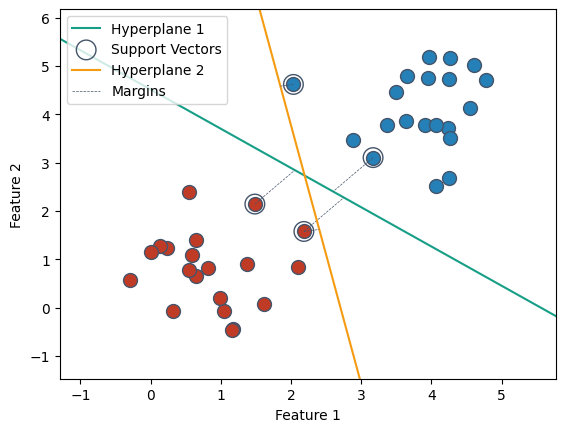

In [5]:
# Create figure and axis.
fig, ax = plt.subplots()

# Plot the class data.
plot_data(ax, x_red, color="#C03B26", edgecolor="#44546A")
plot_data(ax, x_blue, color="#2580B7", edgecolor="#44546A")

# Get the separating hyperplane.
w = svm_model.coef_[0]
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)

# Plot support vectors and hyperplane.
plot_support_vectors_and_hyperplane(
    ax, svm_model, w, xx, color="#179E86", linestyle="-", label="Hyperplane 1")

# Draw margin lines for each support vector.
for sv in svm_model.support_vectors_:
    draw_margin_lines(
        ax, sv, w, svm_model.intercept_[0], color="#44546A",
        linestyle="--", linewidth=0.5
    )

# Draw a second hyperplane manually with random noise.
A, B = w[0] + np.random.normal(1, 0.5), w[1] + np.random.normal(0, 0.5)
C = svm_model.intercept_[0] + np.random.normal(0.3, 1)
w_random = np.array([A, B])

# Plot the second hyperplane.
yy_random = -A / B * xx - C / B
ax.plot(xx, yy_random, color="#F59B11", linestyle="-", label="Hyperplane 2")

# Draw margin lines for random points.
sv_random = x_blue[-3]
draw_margin_lines(
    ax, sv_random, w_random, C, color="#44546A",
    linestyle="--", linewidth=0.5
)
ax.scatter(
    sv_random[0], sv_random[1], s=200,
    facecolors="none", edgecolors="#44546A"
)

# Draw margin lines for second support vector of the first SVM.
sv_second = svm_model.support_vectors_[1]
draw_margin_lines(
    ax, sv_second, w_random, C, color="#44546A",
    linestyle="--", linewidth=0.5
)

# Add a legend entry for the margin lines without plotting them again.
margin_line = Line2D(
    [0], [0], color="#44546A", linestyle="--", linewidth=0.5, label="Margins")
ax.add_line(margin_line)

# Add labels and legend.
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim(x_red[:, 0].min() - 1, x_blue[:, 0].max() + 1)
ax.set_ylim(x_red[:, 1].min() - 1, x_blue[:, 1].max() + 1)
ax.legend(loc="upper left")

# Show the plot.
plt.show()